In [1]:
import dipy

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs

In [3]:
from fenics import *
from mshr import *
#from math import pi, sin, cos, sqrt
import math
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [4]:
fname = 'dMRI_data/ss-ras_data.nii.gz' 
bval_fname = 'dMRI_data/ss-ras.bval' 
bvec_fname = 'dMRI_data/ss-ras.bvec'

data, affine = load_nifti(fname)
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data_float = data.astype(np.float32)

dataMaxVal = int(max(data.flatten()))
dataMinVal = int(min(data.flatten()))

#print('b values: ', bvals)
#print('b vectors: ', bvecs)

data.shape (104, 104, 72, 32)
b values:  [  0. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700. 700. 700. 700.   0. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700.]
b vectors:  [[ 0.          0.          0.        ]
 [ 0.22293058 -0.49968055 -0.83703119]
 [-0.17871778 -0.49333411 -0.85128242]
 [-0.37542525 -0.14225766 -0.91587037]
 [ 0.41157657 -0.72193778 -0.556247  ]
 [ 0.19853516 -0.93616748 -0.29012811]
 [ 0.84751403 -0.52907634 -0.04240569]
 [ 0.73912424 -0.51868695 -0.42972025]
 [ 0.43850514 -0.15385152 -0.88546205]
 [ 0.75664991 -0.17243032 -0.63067305]
 [ 0.62896943 -0.74815804  0.21132247]
 [ 0.30347744 -0.94898587  0.0855993 ]
 [ 0.28489485 -0.54959691  0.78535217]
 [ 0.62077832 -0.54730117  0.56133366]
 [ 0.97062433 -0.19699152  0.13814011]
 [ 0.83273727 -0.20222756  0.51541471]
 [-0.03439669 -0.75075191  0.65968806]
 [-0.02572841 -0.94997877  0.31125325]
 [-0.68088585 -0.5256443   0.50999278]
 [-0.36761704 -0.53581387  0.76010603]
 [-

In [5]:
#center = Point(0.0, 0.0, 0.0)
#sphere = Sphere(center,1.0)
#mesh = generate_mesh(sphere,20) # 20 specify the resolution of the mesh
#plot(mesh)

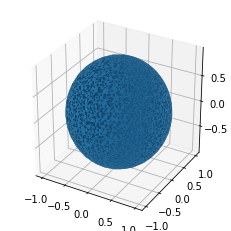

In [6]:
# Mesh and function space
sphere = Sphere(Point(0.0, 0.0, 0.0), 1.0)
vmesh = generate_mesh(sphere, 5)
mesh = BoundaryMesh(vmesh, "exterior")
#plot(mesh)

In [7]:
print(mesh.topology().dim())

2


In [9]:
#V = FunctionSpace(mesh, "CG", 1)
#V = FunctionSpace(mesh, "P", 1)

# get coordinates of DOFs
dof_coords = V.tabulate_dof_coordinates()
# find nearest DOF:
dof1 = np.argmin(np.linalg.norm(dof_coords - bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1, dof_coords[dof1]))
dof1_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1_sym, dof_coords[dof1_sym]))

dof14 = np.argmin(np.linalg.norm(dof_coords - bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14, dof_coords[dof14]))
dof14_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14_sym, dof_coords[dof14_sym]))

dof17 = np.argmin(np.linalg.norm(dof_coords - bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17, dof_coords[dof17]))
dof17_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17_sym, dof_coords[dof17_sym]))

dof20 = np.argmin(np.linalg.norm(dof_coords - bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20, dof_coords[dof20]))
dof20_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20_sym, dof_coords[dof20_sym]))

dof22 = np.argmin(np.linalg.norm(dof_coords - bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22, dof_coords[dof22]))
dof22_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22_sym, dof_coords[dof22_sym]))

dof29 = np.argmin(np.linalg.norm(dof_coords - bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29, dof_coords[dof29]))
dof29_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29_sym, dof_coords[dof29_sym]))

# now define a DirichletBC at that point
bcs = [DirichletBC(V, Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof1][0], y=dof_coords[dof1][1], z=dof_coords[dof1][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof1_sym][0], y=dof_coords[dof1_sym][1], z=dof_coords[dof1_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14][0], y=dof_coords[dof14][1], z=dof_coords[dof14][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14_sym][0], y=dof_coords[dof14_sym][1], z=dof_coords[dof14_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17][0], y=dof_coords[dof17][1], z=dof_coords[dof17][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17_sym][0], y=dof_coords[dof17_sym][1], z=dof_coords[dof17_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20][0], y=dof_coords[dof20][1], z=dof_coords[dof20][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20_sym][0], y=dof_coords[dof20_sym][1], z=dof_coords[dof20_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22][0], y=dof_coords[dof22][1], z=dof_coords[dof22][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22_sym][0], y=dof_coords[dof22_sym][1], z=dof_coords[dof22_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29][0], y=dof_coords[dof29][1], z=dof_coords[dof29][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29_sym][0], y=dof_coords[dof29_sym][1], z=dof_coords[dof29_sym][2]),
                 'pointwise'),
     ]

#Test BC
#u_D = Expression('x[0]*x[0] + x[1]*x[1] - 2*x[2]*x[2]', degree=2)
#bcs = [DirichletBC(V, u_D, boundary1, method="pointwise"), 
#       DirichletBC(V, u_D, boundary14, method="pointwise"),
#       DirichletBC(V, u_D, boundary17, method="pointwise"),
#       DirichletBC(V, u_D, boundary20, method="pointwise"),
#       DirichletBC(V, u_D, boundary22, method="pointwise"),
#       DirichletBC(V, u_D, boundary29, method="pointwise"),]


u = TrialFunction(V) 
v = TestFunction(V)
w = Function(V)      

x = SpatialCoordinate(mesh)
phi = Expression("atan2(x[1],x[0])", degree=2)
theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)


#r = Expression("x[0]", degree=1)
###theta = Expression("x[1]", degree=1)
###phi = Expression("x[2]", degree=1)
#phi = Expression("x[1]", degree=1)
#theta = Expression("x[2]", degree=1)


#r, phi, theta = SpatialCoordinate(mesh)
#x = r * sin(theta) * cos(phi)

#lamb = .6     
#f = Expression("lamb*(lamb + 1)*(sin(x[2]))**lamb*sin(lamb*x[1])", lamb=lamb) 
f = Constant(0.0)

#Weak formulation

#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx
#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = (u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a = (a2+a3)*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
##a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
##a5 = (Constant(2.)/r)*u.dx(0)*v
##a = (a1+a2+a3-a4-a5)*dx
#a = (a1+a2+a3)*dx

#Different weak formulation
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
#theta = Expression("atan2(x[1],x[0])", degree=2)
#phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
#a5 = (Constant(2.)/r)*u.dx(0)*v
#a = (a1+a2+a3-a4-a5)*dx

#Different weak formulation for shpere surface
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
#phi = Expression("atan2(x[1],x[0])", degree=2)
#theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#theta = Expression("atan2(x[1],x[0])", degree=2)
#phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)

a2 = u.dx(1)*v.dx(1)
a3 = (Constant(1.)/sin(theta)**2)*(u.dx(2)*v.dx(2))
a4 = (cos(theta)/sin(theta))*u.dx(1)*v
a = (a2+a3-a4)*dx
#a1 = (sin(theta)*sin(theta)*sin(phi)*sin(phi)+cos(theta)*cos(phi)/sin(theta))*(u.dx(0)*v.dx(0))
#a2 = (cos(theta)*cos(theta)*sin(phi)*sin(phi)+cos(phi)*cos(phi))*(u.dx(1)*v.dx(1))
#a3 = (sin(phi)**2/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a4 = (-sin(theta)*sin(phi)*sin(phi)*cos(theta)+cos(theta)*cos(phi)*cos(phi)*sin(theta))*(u.dx(0)*v.dx(1))
#a5 = (-cos(theta)*cos(phi)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (-cos(theta)*sin(phi)*sin(phi))*(u.dx(1)*v.dx(2))
#a7 = (cos(theta)*sin(phi))*(u.dx(0)*v)
#a8 = (-cos(theta)*cos(theta)*sin(phi)/sin(theta))*(u.dx(1)*v)            
#a = (a1+a2+a3+a4+a5+a6+a7+a8)*dx

#Different weak formulation
#a1 = (Constant(1.0)+((cos(theta)/sin(theta))-1)*cos(phi)**2)*(u.dx(0)*v.dx(0))
#a2 = u.dx(1)*v.dx(1)
#a3 = (cos(phi)**2+(sin(phi)**2/sin(theta)**2))*(u.dx(2)*v.dx(2))
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12)*dx


#Different weak formulation
#a1 = u.dx(0)*v.dx(0)
#a2 = u.dx(1)*v.dx(1)
#a3 = u.dx(2)*v.dx(2)
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a10+a11+a12)*dx

#L = inner(f,v)*dx
L = f*v*dx
#L = Constant(0.0)

#for bc in bcs: 
#    bc.apply(a,L)
    
#solve(a == L, w, bc)
solve(a == L, w, bcs)

dof 1211, x = [ 0.19719048 -0.51419234 -0.8261487 ]
dof 2776, x = [-0.24995911  0.50968857  0.81550965]
dof 1620, x = [ 0.97262925 -0.18735501  0.10768775]
dof 2497, x = [-0.96809862  0.19572132 -0.13430197]
dof 3643, x = [-0.03240181 -0.94220368  0.3201121 ]
dof 500, x = [ 0.04957984  0.94018901 -0.32325163]
dof 477, x = [-0.13480662  0.20061985 -0.96702667]
dof 3665, x = [ 0.13162945 -0.21144639  0.96550909]
dof 3874, x = [-0.25340938 -0.18208023  0.94585968]
dof 211, x = [ 0.2447571   0.17953656 -0.94862141]
dof 3216, x = [-0.8584785  -0.49324049 -0.09832676]
dof 799, x = [0.84438311 0.51620324 0.09348987]


In [10]:
# Save solution to file in VTK format
vtkfile = File('LH/solution.pvd')
vtkfile << w

In [11]:
array_u = nodal_values_u = w.vector()
vertex_values_u = w.compute_vertex_values()

In [12]:
print(array_u)

In [13]:
for i in range(len(array_u)):
    print(array_u[i])

73.00805059395925
74.40060131619026
72.54944935724177
71.43337962543308
73.08549784035252
74.75998989626207
75.41181623160294
75.10769662299036
73.6187913511598
71.6784521762435
70.38066322801369
69.73128364774641
70.73988908948598
71.80956721070967
73.06965795787065
74.10587438371752
75.14219002582452
76.00970969880579
76.43774663992595
76.17851610404325
76.21664888056316
74.93247220273145
73.71856799868802
72.28041404984698
70.39769185954025
69.06871689521807
68.76303254911302
68.88870230086656
69.894182909466
70.70966019205275
71.24320062291073
72.27315045841107
73.22568050575002
74.31468478747006
75.07869807548892
77.14346687390261
77.09156770381969
77.89951837529036
77.44612005623881
77.3904918850261
76.43145965144599
75.43754721663026
74.32713240326686
73.29244702844834
71.36147318743483
69.19824117516512
68.02327460125478
67.58491786737048
68.08723430178773
69.17854052061334
69.65876204233192
70.10700401528472
70.56312200129695
71.34576833867483
71.88689705326519
72.656732576237

85.3633184603972
84.83872151335818
84.24120267903513
83.69738397884592
83.19533564215322
82.73187069254169
82.07393214681562
81.36379157430994
80.72922570985375
80.12085307872621
79.64197365465431
79.02463089888158
78.1278209766699
77.47782940566917
76.81190895639111
75.40405402597447
74.63785964008895
73.62381244841595
72.6605948347944
71.37565749041507
70.12820066016893
68.81047801418778
66.32156766081
59.440740371881375
59.261364027422594
63.90127184517228
70.98304152179657
70.80833397500228
72.36854753365677
74.86075579159453
76.40526441607766
77.31465943134407
78.84428271704998
79.8266464119994
80.72401472868272
81.08312370096235
81.30851540999572
81.25568254007383
81.65050914139555
81.8418179359064
82.3220692197859
82.61959073013664
82.5465524722356
82.35317765837432
82.10913759108216
81.97970825310486
82.03569909001934
82.2218572375278
82.11177229566974
82.25798402440505
82.07480296370224
81.75591493900458
81.66035559892252
81.38598937637116
81.02092913486352
80.63211952161178
8

85.53012796775026
85.57378403005707
85.60057812067781
85.4072385831154
86.00732187012125
86.13223553728889
85.8182802831634
86.14006295681394
86.54967334327047
86.40378372937474
86.21696109103218
86.1956235826286
85.89942810400152
85.78413401845927
85.80117746829393
85.90306130165224
85.60162884602275
85.15519157523119
84.96030848714678
84.43813414211682
83.9192636035503
83.25384887164692
82.60558254678023
82.20951753290234
81.45042546603912
80.74996988817306
80.46269095100955
79.34722779381534
79.5112041339858
83.92910649151082
82.15345676455343
78.6338002560392
78.05095474521025
77.31757372884748
76.51856615069894
75.71435538860207
74.82679133344371
73.83787428285646
80.45332224137667
85.08242153611897
84.61213129154976
85.02915726700647
85.34127880265744
85.43570119766308
85.87988544273419
86.60665591470857
86.3770980185551
86.32276520904465
86.46709038500481
86.63151276176912
86.59710944338518
86.69689513420974
86.53450626699897
86.29169013974419
85.99052153209819
85.73347402832773

77.89840798930514
77.21724193536296
76.15127577333136
76.07902676964065
75.21540774216103
74.36908888713033
73.96592199643766
73.54589671354329
74.13670253365693
75.24026095998109
75.96695381031283
78.97106330113645
79.40953533582389
79.90271588139008
79.33490487409317
78.74130016778271
78.86357600245495
79.36564084758822
80.13117278839412
80.97833195296433
81.92913442184035
83.13599713995814
83.23218620975173
83.97798716390741
85.222405925276
86.058273287978
85.7635236585014
86.47162045213578
86.80409907885753
87.24856939816014
87.5912298457773
87.8626691604778
88.35784157433825
88.33982147347326
88.86220111412663
89.57141853275319
90.15001835653334
89.36914366876297
88.92099652634047
88.38251190921636
88.0305034009028
87.75657895393552
87.53261359120204
87.31169156712167
86.93424634023326
86.89647416820216
87.04521812609883
86.59928201290406
85.60286024113404
84.91010253667393
84.26133508573119
83.36341325137346
82.47444824852415
81.57881522994514
81.24158709908203
80.62873730880457


77.70974474741377
78.4309849682181
79.29106549188914
79.69305306892586
80.26089908640344
80.8544240198735
81.45236513877839
81.92629830638305
81.94041516915132
81.87149388615006
81.91153718861263
82.09338863323373
81.81220945192082
81.9455707629818
82.15100434040242
82.2938247580932
82.20929834245419
82.22826100223176
82.02301932777101
82.31374149071046
82.08417687666939
82.1709588263327
82.21457651884174
78.87398492671018
77.30074599804084
73.78088454100958
81.8004792981185
81.32169264333383
80.82873966964281
80.26722572261981
79.02565406677843
78.24453083989742
69.0743260050839
76.88821397945716
74.17214963411223
67.64779086193458
65.79677025404202
65.59616175998711
65.67572525935428
66.34860863832188
67.06890412953969
68.28612377420983
69.16722316341391
69.79467990757567
70.96596415642271
70.79762606626792
71.44854657827456
72.20970128176192
73.12783988187262
73.96878410093365
74.14994885759658
74.56469618153146
75.43220824039113
76.54745508218824
77.416327537626
78.32081929650617
7

In [14]:
min(array_u)

51.0

In [15]:
len(array_u)

4137

In [16]:
bvecs[1][0]

0.22293058

In [17]:
bvecs[1][2]

-0.83703119

In [18]:
data_float[60,50,56,1]

51.0

In [19]:
data_float[60,50,56,14]

90.0

In [20]:
data_float[60,50,56,17]

92.0

In [21]:
data_float[60,50,56,20]

83.0

In [22]:
data_float[60,50,56,22]

54.0

In [23]:
data_float[60,50,56,29]

106.0

In [24]:
#error_L2 = errornorm(u_D, w, 'L2')
#vertex_values_u_D = u_D.compute_vertex_values(mesh)
#vertex_values_u = w.compute_vertex_values(mesh)
#error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
#print(error_max)
#print(error_L2)

In [25]:
bvecs[27]

array([-0.70739847, -0.15345097, -0.68995672])

In [26]:
x_point = Point(*[bvecs[27]])
mesh.bounding_box_tree().compute_first_entity_collision(x_point)

4294967295

In [27]:
#mesh.bounding_box_tree().compute_closest_point(x_point)

In [28]:
def project_point_onto_affine_subspace(p, V):
    """Projects a point onto an affine subspace

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points / affine subspaces
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of affine subspace

    For a single point / affine subspace:
        - p is the point in R^N to be projected onto the affine subspace
        - The affine subspace is the set of all affine combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points / affine subspaces, each point is
    projected onto its corresponding affine subspace
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith affine subspace

    Example usage:
        import numpy as np
        spatial_dim = 3
        p1 = np.random.randn(spatial_dim)
        V1 = np.array([[2., 0., 0.],
                      [2., 1., 0.],
                      [2., 0., 1.]])
        p2 = np.random.randn(spatial_dim)
        V2 = np.array([[0., 3., 0.],
                       [1., 3., 0.],
                       [0., 3., 1.]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p, affine_coordinates = project_point_onto_affine_subspace(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        print('p1=', p1)
        print('projected_p1=', projected_p1)
        print('p2=', p2)
        print('projected_p2=', projected_p2)
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    if k == 1:
        affine_coordinates = np.ones((num_pts, 1))
    else:
        VV0 = VV[:, 0, :].reshape((num_pts, 1, N))
        dVV = VV[:, 1: :].reshape((num_pts, k-1, N)) - VV0
        dPP = PP.reshape((num_pts, 1, N)) - VV0

        if k == 2:
            PHI = np.sum(dVV * dVV, axis=-1).reshape((num_pts))
            RHS = np.sum(dVV * dPP, axis=-1).reshape((num_pts))
            cc_rest = (RHS / PHI).reshape((num_pts, 1))
        else:
            PHI = np.einsum('xiz,xjz->xij', dVV, dVV) # shape = (num_pts, k-1, k-1)
            iPHI = np.linalg.inv(PHI) # shape = (num_pts, k-1, k-1)

            RHS = np.sum(dVV * dPP, axis=-1)  # shape = (num_pts, k-1)
            cc_rest = np.einsum('pij,pj->pi', iPHI, RHS)  # shape = (num_pts, k-1)

        cc_first = (1. - np.sum(cc_rest, axis=1)).reshape((num_pts, 1))
        affine_coordinates = np.concatenate([cc_first, cc_rest], axis=1) # shape = (num_pts, k)

    PP_projected = np.einsum('pi,pij->pj', affine_coordinates, VV) # shape = (num_pts, N)

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
        affine_coordinates = affine_coordinates.reshape(-1)
    return PP_projected, affine_coordinates

def powerset(s):
    # NOT MY CODE. FROM USER "hughdbrown" ON STACKOVERFLOW HERE:
    # https://stackoverflow.com/a/1482320/484944
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

def closest_point_on_simplex(p, V):
    """Projects a point onto a simplex (triangle, tetrahedron, etc)

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points/simplices
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of simplex

    For a single point/simplex:
        - p is the point in R^N to be projected onto the simplex
        - The simplex is the set of all convex combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points/simplices, each point is
    projected onto its corresponding simplex
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith simplex

    Example usage:
        import numpy as np
        import matplotlib.pyplot as plt
        p1 = np.array([1.1, 0.4])
        V1 = np.array([[0., 0.],
                       [0., 1.],
                       [1., 0.]])
        p2 = np.array([-0.3, 1.1])
        V2 = np.array([[-1.0, 0.],
                       [0.,   0.],
                       [-0.5, 0.5]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p = closest_point_on_simplex(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        plt.figure()
        t1 = plt.Polygon(V1)
        plt.gca().add_patch(t1)
        plt.plot([p1[0], projected_p1[0]],
                 [p1[1], projected_p1[1]], 'r')
        t2 = plt.Polygon(V2)
        plt.gca().add_patch(t2)
        plt.plot([p2[0], projected_p2[0]],
                 [p2[1], projected_p2[1]], 'r')
        plt.gca().set_aspect('equal')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    subsets = list(powerset(list(range(k)))) # e.g., [[], [0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]
    QQ = list()
    CC = list()
    for s in subsets:
        if s:
            simplicial_facet = VV[:,s,:]
            Q, C = project_point_onto_affine_subspace(PP, simplicial_facet)
            QQ.append(Q)
            CC.append(C)

    distances = np.stack([np.linalg.norm(Q - PP, axis=-1) for Q in QQ]) # shape=(num_facets, num_pts)

    good_inds = np.stack([(np.all(0. <= C, axis=1) & np.all(C <= 1., axis=1)) for C in CC]) # shape=(num_facets, num_pts)
    bad_inds = np.logical_not(good_inds)
    distances[bad_inds] = np.inf
    closest_inds = np.expand_dims(np.argmin(distances[:, :, None], axis=0), axis=0)

    QQ_stack = np.stack(QQ) # shape=(num_facets, num_pts, N)
    PP_projected = np.take_along_axis(QQ_stack, closest_inds, axis=0)[0,:,:]

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
    return PP_projected

def closest_point_in_mesh(p, mesh):
    """Finds the nearest point in a mesh to a given point
    p is the point or points (numpy array)
    mesh is the fenics/dolfin mesh

    p.shape = (N,) OR (num_pts, N) for vectorization over many points
    N = dimension of ambient space

    Example usage:
        import numpy as np
        import dolfin as dl
        import matplotlib.pyplot as plt
        mesh = dl.UnitSquareMesh(13,9)
        num_pts = 20
        p = np.random.randn(num_pts, 2) + np.array([0.5, 0.5])
        closest_p = closest_point_in_mesh(p, mesh)
        plt.figure()
        dl.plot(mesh)
        for ii in range(num_pts):
            plt.plot([p[ii,0], closest_p[ii,0]], [p[ii,1], closest_p[ii,1]], 'b')
            plt.plot(p[ii,0], p[ii,1], '*k')
            plt.plot(closest_p[ii,0], closest_p[ii,1], '.r')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p[None,:]
    else:
        PP = p
    num_pts, N = PP.shape
    tdim = mesh.topology().dim()
    k = tdim + 1

    VV = np.zeros((num_pts, k, N))
    bbt = mesh.bounding_box_tree()
    for ii in range(num_pts):
        pi = PP[ii,:]
        closest_entity, closest_distance = bbt.compute_closest_entity(Point(pi))
        closest_cell = mesh.cells()[closest_entity]
        vertices_of_closest_cell = mesh.coordinates()[closest_cell, :]
        VV[ii, :, :] = vertices_of_closest_cell

    closest_PP = closest_point_on_simplex(PP, VV)

    if len(p.shape) == 1:
        closest_PP = closest_PP.reshape(-1)
    return closest_PP

In [29]:
closest_p = closest_point_in_mesh(bvecs[27], mesh)
print(bvecs[27])
print(closest_p)
print(w(closest_p))

[-0.70739847 -0.15345097 -0.68995672]
[-0.56092782 -0.49898095 -0.65093901]
84.15069054785842


In [30]:
closest_p = closest_point_in_mesh(-bvecs[27], mesh)
print(-bvecs[27])
print(closest_p)
print(w(closest_p))

[0.70739847 0.15345097 0.68995672]
[0.70270774 0.15239172 0.68510567]
85.96767373543399


In [31]:
array_1 = np.array([[1, 2, 7], [3, 4, 8]])

In [32]:
array_2 = np.array([[1, 2], [3, 9], [4, 16]]) 

In [33]:
np.dot(array_1, array_2)

array([[ 35, 132],
       [ 47, 170]])